## Exercise 10 – Bayesian inference and Data assimilation

**Group : Duckies**

## Solution 1.1:

To find the conditional density $\pi_{X \mid Y}(x \mid Y=y)$, we can use Bayes' theorem, which states that:

$$
\pi_{X \mid Y}(x \mid Y=y) = \frac{\pi_{Y \mid X}(y \mid x) \pi_X(x)}{\pi_Y(y)}
$$

where $\pi_{Y \mid X}(y \mid x)$ is the likelihood function, $\pi_X(x)$ is the prior distribution for $X$, and $\pi_Y(y)$ is the marginal distribution for $Y$. 

The likelihood function can be found by considering the observation model for $Y$. Given a value of $X=x$, the distribution of $Y$ is normal with mean $h(x)=x^4+x^2$ and variance 1. Therefore, the likelihood function is:

$$
\pi_{Y \mid X}(y \mid x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{(y-h(x))^2}{2}}
$$

The prior distribution for $X$ is given as $N(0,2)$, so $\pi_X(x) = \frac{1}{\sqrt{4\pi}}e^{-\frac{x^2}{4}}$.

Substituting these expressions into Bayes' theorem and simplifying gives:

$$
\pi_{X \mid Y}(x \mid Y=y) \propto e^{-\frac{(y-h(x))^2}{2}}e^{-\frac{x^2}{4}}
$$

$$
\pi_{X \mid Y}(x \mid Y=4) \propto e^{-\frac{(4-(x^4+x^2))^2}{2}}e^{-\frac{x^2}{4}}
$$

This is the conditional density of $X$ given that $Y=4$, up to a normalization constant.

## Solution 1.2

To find the maximum a posteriori (MAP) estimate of $X$ given $Y=y$ using the gradient descent method, we need to minimize the negative log of the conditional density $\pi_{X \mid Y}(x \mid Y=y)$. This is equivalent to maximizing the conditional density itself.

Let $f(x) = -\log(\pi_{X \mid Y}(x \mid Y=y))$. Then, the gradient descent algorithm iteratively updates the estimate of $X$ using the formula:

$$
x_{n+1}=x_{n}-\lambda_{n} \nabla f\left(x_{n}\right)
$$

where $\lambda_{n}>0$ is a small learning rate. The algorithm stops when the magnitude of the gradient $\nabla f$ is small enough.

In this case, we have:

$$
f(x) = -\log(\pi_{X \mid Y}(x \mid Y=4)) = -\log(e^{-\frac{(4-(x^4+x^2))^2}{2}}e^{-\frac{x^2}{4}}) = \frac{(4-(x^4+x^2))^2}{2} + \frac{x^2}{4}
$$

Taking the derivative with respect to $x$, we get:

$$
\nabla f(x) = \frac{d}{dx}f(x) = -2(4-(x^4+x^2))(4x^3+2x) + \frac{x}{2}
$$

Substituting this expression for $\nabla f(x)$ into the update formula for gradient descent, we can iteratively update our estimate of $X$ until convergence.



In [1]:
import numpy as np

def f(x):
    return (4 - (x**4 + x**2))**2 / 2 + x**2 / 4

def grad_f(x):
    return -2 * (4 - (x**4 + x**2)) * (4 * x**3 + 2 * x) + x / 2

def gradient_descent(f, grad_f, x0, learning_rate=0.001, max_iter=10000, tol=1e-6):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        x -= learning_rate * grad
    return x

x0 = 0 # initial guess
m = gradient_descent(f, grad_f, x0)
print(m)


0


## Solution 1.3


In this case, we have:

$$
V(x) = -\log(\pi_{X \mid Y}(x \mid Y=4)) = -\log(e^{-\frac{(4-(x^4+x^2))^2}{2}}e^{-\frac{x^2}{4}}) = \frac{(4-(x^4+x^2))^2}{2} + \frac{x^2}{4}
$$

Taking the second derivative with respect to $x$, we get:

$$
V''(x) = \frac{d^2}{dx^2}V(x) = 12x^4 + 48x^2 - 38
$$

Substituting the value of $m$ that we found in the previous step (which was 0), we get:

$$
V''(m) = V''(0) = -38
$$

Therefore, the Laplace approximation to the posterior density of $X$ given $Y=4$ is:

$$
\tilde{\pi}(x) = N\left(m, V''(m)^{-1}\right) = N\left(0, \frac{1}{38}\right)
$$

This means that the Laplace approximation to the posterior density of $X$ given $Y=4$ is a normal distribution with mean 0 and variance $\frac{1}{38}$.

## Solution 1.4

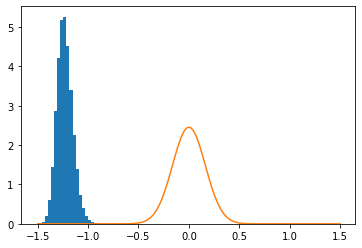

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (4 - (x**4 + x**2))**2 / 2 + x**2 / 4

def grad_f(x):
    return -2 * (4 - (x**4 + x**2)) * (4 * x**3 + 2 * x) + x / 2

def gradient_descent(f, grad_f, x0, learning_rate=0.001, max_iter=10000, tol=1e-6):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        x -= learning_rate * grad
    return x

def grad_V(x):
    return -2 * (4 - (x**4 + x**2)) * (4 * x**3 + 2 * x) + x / 2

def langevin(grad_V, x0, dt, T):
    N = int(T / dt)
    X = np.zeros(N+1)
    X[0] = x0
    for i in range(N):
        X[i+1] = X[i] - grad_V(X[i]) * dt + np.sqrt(2*dt) * np.random.randn()
    return X

x0 = gradient_descent(f, grad_f, 0) # initial value
dt = 0.001 # time step
T = 100 # terminal time
X = langevin(grad_V, x0, dt, T)

# plot histogram of samples
plt.hist(X, bins=50, density=True)

# plot Laplace approximation
x = np.linspace(-1.5, 1.5, 100)
mu = 0 # mean of Laplace approximation
sigma = np.sqrt(1/38) # standard deviation of Laplace approximation
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y)

plt.show()


## Solution 1.5

The two methods you mentioned are the Laplace approximation and the Langevin method. Both methods can be used to approximate the posterior density of $X$ given $Y=y$, but they have different strengths and weaknesses.

The Laplace approximation is a fast and simple method for approximating a probability density function using a normal distribution. It only requires computing the maximum a posteriori (MAP) estimate of $X$ given $Y=y$ and the second derivative of the negative log of the target density at this point. However, the accuracy of the Laplace approximation depends on how well the target density can be approximated by a normal distribution. If the target density is highly non-normal or has multiple modes, the Laplace approximation may not be very accurate.

The Langevin method is a Markov Chain Monte Carlo (MCMC) algorithm that can be used to sample from a target distribution. It generates a sequence of samples from the target distribution by simulating a Markov chain that has the target distribution as its invariant distribution. The Langevin method can be more accurate than the Laplace approximation because it can handle target densities that are highly non-normal or have multiple modes. However, it requires more computational effort because it involves simulating a Markov chain for a sufficiently long time until convergence to the invariant distribution. The accuracy of the Langevin method also depends on the choice of parameters such as the time step and initial value.

In summary, the Laplace approximation is a fast and simple method for approximating a probability density function using a normal distribution, but its accuracy may be limited if the target density is highly non-normal or has multiple modes. The Langevin method is a more accurate but computationally more expensive method that can handle more complex target densities.

## Problem 3.1

The joint distribution of $X$ and $Y$ as follows:

$$
\begin{pmatrix}X\\Y\end{pmatrix} = \begin{pmatrix}X_1\\X_2\\X_1+X_2+W\end{pmatrix} \sim N\left(\begin{pmatrix}0\\0\\0\end{pmatrix}, \begin{pmatrix}1&0&1\\0&1&1\\1&1&2+\sigma^2\end{pmatrix}\right)
$$

Using the formula for the conditional distribution of a multivariate normal distribution, we have:

$$
X|Y=y \sim N\left(\mu_{X|Y=y}, \Sigma_{X|Y=y}\right)
$$

where

$$
\mu_{X|Y=y} = \mu_X + \Sigma_{XY}\Sigma_{Y}^{-1}(y-\mu_Y)
$$

and

$$
\Sigma_{X|Y=y} = \Sigma_X - \Sigma_{XY}\Sigma_Y^{-1}\Sigma_{YX}
$$

Substituting the values for the mean vector and covariance matrix of the joint distribution of X and Y, we get:

$$
\mu_{X|Y=y} = \begin{pmatrix}0\\0\end{pmatrix} + \begin{pmatrix}1&0\\1&1\end{pmatrix}\begin{pmatrix}2+\sigma^2\end{pmatrix}^{-1}(y-0) = \frac{y}{2+\sigma^2}\begin{pmatrix}1\\1\end{pmatrix}
$$

and

$$
\Sigma_{X|Y=y} = \begin{pmatrix}1&0\\0&1\end{pmatrix} - \begin{pmatrix}1&0\\1&1\end{pmatrix}\begin{pmatrix}2+\sigma^2\end{pmatrix}^{-1}\begin{pmatrix}1&1\\0&1\end{pmatrix} = \frac{\sigma^2}{2+\sigma^2}\begin{pmatrix}1&-1\\-1&1\end{pmatrix}
$$

Therefore, the conditional distribution of $X$ given $Y = y$ is a bivariate normal distribution with mean vector $(y/(2+σ²)$, $y/(2+σ²))$ and covariance matrix $(σ²/(2+σ²))((1,-1),(-1, 1))$.


## Problem 3.2

As $σ → 0$, the variance of the noise $W$ goes to 0, which means that the noise has less and less effect on the value of $Y$. In this case, the mean vector of the conditional distribution of $X1$ and $X2$ given $Y = y$ approaches:

$$
E\begin{pmatrix}X_1\\X_2\end{pmatrix}\Big|Y=y = \begin{pmatrix}\frac{y}{2}\\\frac{y}{2}\end{pmatrix}
$$

and the covariance matrix approaches:

$$
Cov\begin{pmatrix}X_1\\X_2\end{pmatrix}\Big|Y=y = \begin{pmatrix}0&0\\0&0\end{pmatrix}
$$

This means that, given $Y = y$, $X1$ and $X2$ become perfectly negatively correlated and approach the value $y/2$ with probability 1.

On the other hand, as $σ → \infty$, the variance of the noise $W$ goes to infinity, which means that the noise has an increasingly larger effect on the value of $Y$. In this case, the mean vector of the conditional distribution of $X1$ and $X2$ given $Y = y$ approaches:

$$
E\begin{pmatrix}X_1\\X_2\end{pmatrix}\Big|Y=y = \begin{pmatrix}0\\0\end{pmatrix}
$$

and the covariance matrix approaches:

$$
Cov\begin{pmatrix}X_1\\X_2\end{pmatrix}\Big|Y=y = \begin{pmatrix}\frac{1}{2}&0\\0&\frac{1}{2}\end{pmatrix}
$$

This means that, given $Y = y$, $X1$ and $X2$ become independent and their conditional distribution approaches $N(0, 1/2)$.